In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os,sys
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
from tensorflow.image import rgb_to_grayscale

from tensorflow.keras.models import Sequential
 

In [2]:
img_size=224
batch_size=64
data_train=ImageDataGenerator(horizontal_flip=True)
train=data_train.flow_from_directory("../input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images",target_size=
(224,224), batch_size=batch_size, class_mode='categorical', shuffle=True)
datagen_validation=ImageDataGenerator(horizontal_flip=True)

test=datagen_validation.flow_from_directory("../input/testset123/test",target_size=
(224,224), batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 35126 images belonging to 5 classes.
Found 566 images belonging to 5 classes.


In [3]:
model=Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape= (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', input_shape= (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same', input_shape= (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', input_shape= (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024,(3,3), padding='same', input_shape= (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(5, activation='softmax'))
opt=Adam(lr=0.0005)

In [4]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     5

In [5]:
epochs=10
steps_per_epoch=train.n//train.batch_size
steps_per_epoch
validation_steps=train.n//test.batch_size
history= model.fit(x=train,steps_per_epoch=steps_per_epoch,epochs=epochs,validation_data=test,validation_steps=validation_steps)

Epoch 1/10
548/548 [==============================] - 374s 670ms/step - loss: 0.9894 - accuracy: 0.7050 - val_loss: 1.8276 - val_accuracy: 0.4117
Epoch 2/10
548/548 [==============================] - 176s 321ms/step - loss: 0.9034 - accuracy: 0.7304
Epoch 3/10
548/548 [==============================] - 177s 323ms/step - loss: 0.8948 - accuracy: 0.7294
Epoch 4/10
548/548 [==============================] - 178s 324ms/step - loss: 0.8795 - accuracy: 0.7325
Epoch 5/10
548/548 [==============================] - 179s 326ms/step - loss: 0.8757 - accuracy: 0.7310
Epoch 6/10
548/548 [==============================] - 179s 326ms/step - loss: 0.8579 - accuracy: 0.7387
Epoch 7/10
548/548 [==============================] - 180s 328ms/step - loss: 0.8578 - accuracy: 0.7352
Epoch 8/10
548/548 [==============================] - 182s 332ms/step - loss: 0.8572 - accuracy: 0.7362
Epoch 9/10
548/548 [==============================] - 183s 334ms/step - loss: 0.8586 - accuracy: 0.7357
Epoch 10/10
548/548 [=

In [32]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
img=load_img('../input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Moderate/10112_left.png',target_size=(224,224))
x=img_to_array(img)
x=x/225
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [33]:
pr=model.predict(x)

In [34]:
np.argmax(pr)

2

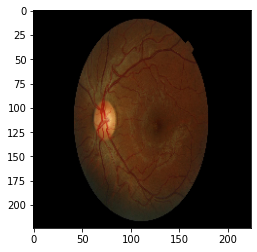

In [35]:
plt.imshow(img)

In [36]:

dir=os.listdir("../input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images")
for expression in dir:
     print(expression);

Mild
Proliferate_DR
Moderate
No_DR
Severe
